In [1]:
import os
import tmscoring
from Bio.PDB import PDBIO, MMCIFParser
import matplotlib.pyplot as plt

fold_dir = '../../datasets/alphafold3_tmscore_tests'

natural_path_dict_cif = {}
de_novo_path_dict_cif = {}
natural_path_dict_pdb = {}
de_novo_path_dict_pdb = {}

# Loop over all files in the datasets/alphafold3_tmscores_test directory
# check if all 100 folders with the natural folds and the 100 with de novo folds are present
for i in range(1, 101):
    if not os.path.exists(f'{fold_dir}/test_{i}_natural/fold_test_{i}_natural_model_0.cif'):
        print(f"Folder test_{i}_natural is missing")
    else:
        natural_path_dict_cif[i] = f'{fold_dir}/test_{i}_natural/fold_test_{i}_natural_model_0.cif'
        natural_path_dict_pdb[i] = f'{fold_dir}/test_{i}_natural/fold_test_{i}_natural_model_0.pdb'
    if not os.path.exists(f'{fold_dir}/test_{i}_de_novo/fold_test_{i}_de_novo_model_0.cif'):
        print(f"Folder test_{i}_de_novo is missing")
    else:
        de_novo_path_dict_cif[i] = f'{fold_dir}/test_{i}_de_novo/fold_test_{i}_de_novo_model_0.cif'
        de_novo_path_dict_pdb[i] = f'{fold_dir}/test_{i}_de_novo/fold_test_{i}_de_novo_model_0.pdb'

# print(natural_path_dict)
# print(de_novo_path_dict)

# If they don't exist, make the files PDB
pdb_parser = PDBIO()
mmcif_parser = MMCIFParser()
for i in range(1, 101):
    if not os.path.exists(de_novo_path_dict_pdb[i]):
        struct = mmcif_parser.get_structure("", de_novo_path_dict_cif[i])
        pdb_parser.set_structure(struct)
        pdb_parser.save(de_novo_path_dict_pdb[i])
    if not os.path.exists(natural_path_dict_pdb[i]):
        struct = mmcif_parser.get_structure("", natural_path_dict_cif[i])
        pdb_parser.set_structure(struct)
        pdb_parser.save(natural_path_dict_pdb[i])

tm_scores = []
rmsd_scores = []
for i in range(1, 101):
    tm = tmscoring.get_tm(natural_path_dict_pdb[i], de_novo_path_dict_pdb[i])
    # alignment = tmscoring.TMscoring(natural_path_dict_pdb[i], de_novo_path_dict_pdb[i])
    # alignment.optimise()
    # tm = alignment.tmscore(**alignment.get_current_values())

    rmsd = tmscoring.get_rmsd(natural_path_dict_pdb[i], de_novo_path_dict_pdb[i])
    # alignment = tmscoring.RMSDscoring(natural_path_dict_pdb[i], de_novo_path_dict_pdb[i])
    # alignment.optimise()
    # rmsd = alignment.rmsd(**alignment.get_current_values())
    if tm < 0.4:
        print(f"Natural fold {i} vs. de novo fold {i}: TM-score = {tm}, RMSD = {rmsd}")
        print(natural_path_dict_pdb[i])
        # print(de_novo_path_dict_pdb[i])
        # alignment = tmscoring.TMscoring(natural_path_dict_pdb[i], de_novo_path_dict_pdb[i])
        # alignment.optimise()
        # alignment.write(outputfile=f"test_{i}_natural_vs_de_novo.pdb")

    # print(f"Natural fold {i} vs. de novo fold {i}: TM-score = {tm}, RMSD = {rmsd}")
    tm_scores.append(tm)
    rmsd_scores.append(rmsd)


print(f"Average TM-score: {sum(tm_scores) / len(tm_scores)}")
print(f"Average RMSD: {sum(rmsd_scores) / len(rmsd_scores)}")




Natural fold 9 vs. de novo fold 9: TM-score = 0.37634195542740057, RMSD = 3.064215299172872
../../datasets/alphafold3_tmscore_tests/test_9_natural/fold_test_9_natural_model_0.pdb
Natural fold 22 vs. de novo fold 22: TM-score = 0.3691431489209887, RMSD = 3.095159139234531
../../datasets/alphafold3_tmscore_tests/test_22_natural/fold_test_22_natural_model_0.pdb
Natural fold 25 vs. de novo fold 25: TM-score = 0.3777571792635393, RMSD = 3.0543209958230295
../../datasets/alphafold3_tmscore_tests/test_25_natural/fold_test_25_natural_model_0.pdb
Natural fold 33 vs. de novo fold 33: TM-score = 0.37699128614109617, RMSD = 3.0296137869841435
../../datasets/alphafold3_tmscore_tests/test_33_natural/fold_test_33_natural_model_0.pdb
Natural fold 44 vs. de novo fold 44: TM-score = 0.39688389216873593, RMSD = 3.02830740977917
../../datasets/alphafold3_tmscore_tests/test_44_natural/fold_test_44_natural_model_0.pdb
Natural fold 56 vs. de novo fold 56: TM-score = 0.3639362860407283, RMSD = 3.0212482884089

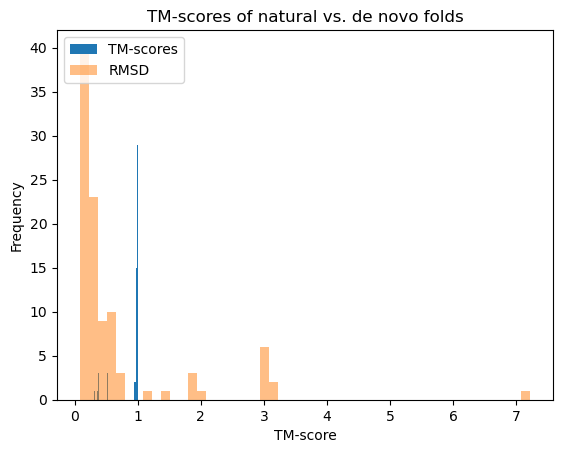

In [3]:

# plot scores as histograms
plt.hist(tm_scores, bins=100, alpha=1, label='TM-scores')
plt.title('TM-scores of natural vs. de novo folds')
plt.xlabel('TM-score')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.savefig("tm_scores.pdf", format="pdf", bbox_inches="tight")

plt.hist(rmsd_scores, bins=50, alpha=0.5, label='RMSD')
plt.legend(loc='upper left')
plt.show()